In [2]:
# after spikesorting is done run the following code to sync the ephys with stimulus data

In [2]:
import datajoint as dj
# import pandas as pd
import numpy as np
# import seaborn as sns
# from datetime import datetime
# from matplotlib import cm
# # from scipy import stats
import matplotlib.pyplot as plt
# # import cv2
# import os
# import math
# from itertools import compress

/mnt/lab/users/stelios/repos/atlab/mouse-neuropixel-export/.venv/lib/python3.12/site-packages/datajoint/plugin.py:2: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [3]:
imagenet = dj.create_virtual_module('imagenet.py', 'pipeline_imagenet')
stimulus = dj.create_virtual_module('stimulus.py', 'pipeline_stimulus')
experiment = dj.create_virtual_module('exp.py', 'pipeline_experiment')
ephys = dj.create_virtual_module('neuropixel_ephys','neuropixel_ephys')
area_map = dj.create_virtual_module('area.py','mdiamantaki_area_mapping') 



[2026-01-14 09:52:33,890][INFO]: Connecting stelios@at-database.stanford.edu:3306
[2026-01-14 09:52:33,924][INFO]: Connected stelios@at-database.stanford.edu:3306


In [4]:
# 2 example session from 1 mouse but different days and different neurons recorded
key = {'animal_id': 29767, 'session': 20, 'scan_idx': 1}
key = {'animal_id': 29767, 'session': 9, 'scan_idx': 1}

# 2 example session from another mouse but different days and different neurons recorded
key = {'animal_id': 29189, 'session': 4, 'scan_idx': 1}
key = {'animal_id': 29189, 'session': 16, 'scan_idx': 1}


key = {'animal_id': 29187, 'session': 10, 'scan_idx': 1}
key = {'animal_id': 29187, 'session': 23, 'scan_idx': 1}
key = {'animal_id': 28489, 'session': 16, 'scan_idx': 1}
key = {'animal_id': 28489, 'session': 25, 'scan_idx': 1}
key = {'animal_id': 27152, 'session': 17, 'scan_idx': 1}

In [5]:
scans_to_export = [
    {'animal_id': 29767, 'session': 20, 'scan_idx': 1},
    {'animal_id': 29767, 'session': 9, 'scan_idx': 1},
    {'animal_id': 29189, 'session': 4, 'scan_idx': 1},
    {'animal_id': 29189, 'session': 16, 'scan_idx': 1},
    {'animal_id': 29187, 'session': 10, 'scan_idx': 1},
    {'animal_id': 29187, 'session': 23, 'scan_idx': 1},
    {'animal_id': 28489, 'session': 16, 'scan_idx': 1},
    {'animal_id': 28489, 'session': 25, 'scan_idx': 1},
]

In [9]:
a = np.array([
    np.array([1, 2, 3, 4]),
    np.array([3, 4, 5]),
    np.array([1, 2, 3]),
], dtype='object')

In [13]:
stimulus.EphysSync & {'animal_id': 29767, 'session': 9, 'scan_idx': 1}

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,beh2stim_slope,beh2stim_intercept,npixel2beh_intercept,npixel2beh_slope,num_npixel_samples,sync_ts
29767,9,1,0.9999904214685309,1684859205.7505844,356.07762967323833,3.3333069388063255e-05,141183000,2026-01-14 09:54:11


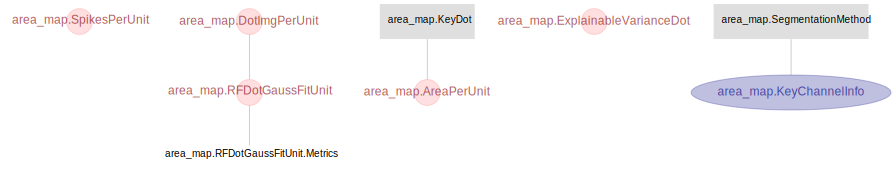

In [6]:
dj.ERD(area_map)

In [5]:
(area_map.AreaPerUnit() & key).fetch('area')

array(['unassigned', 'unassigned', 'unassigned', 'unassigned',
       'unassigned', 'unassigned', 'unassigned', 'unassigned',
       'unassigned', 'unassigned', 'unassigned', 'unassigned',
       'unassigned', 'unassigned', 'unassigned', 'unassigned',
       'unassigned', 'unassigned', 'unassigned', 'unassigned',
       'unassigned', 'unassigned', 'unassigned', 'unassigned',
       'unassigned', 'unassigned', 'unassigned', 'unassigned',
       'unassigned', 'unassigned', 'unassigned', 'unassigned', 'V1', 'V1',
       'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1',
       'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1',
       'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1',
       'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1', 'V1',
       'V1', 'V1', 'V1', 'out', 'out', 'out', 'out', 'out', 'out', 'out'],
      dtype=object)

In [6]:
ephys.CuratedClustering.Unit & (ephys.Session & key)

inc_id incremental encompassing session inc_id,paramset_id,curation_id,unit_id,electrode_config_hash,probe_type e.g. neuropixels_1.0,"electrode electrode index, starts at 0","cluster_quality_label cluster quality type - e.g. 'good', 'MUA', 'noise', etc.",depth depth of the electrode,spike_count how many spikes in this recording for this unit,"spike_times (s) spike times of this unit, relative to the start of the EphysRecording"
91,2,1,0,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,0,mua,20.0,104260,=BLOB=
91,2,1,1,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,11,mua,120.0,3180,=BLOB=
91,2,1,2,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,3,mua,40.0,107790,=BLOB=
91,2,1,3,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,6,mua,80.0,241303,=BLOB=
91,2,1,4,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,10,mua,120.0,357863,=BLOB=
91,2,1,5,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,14,good,160.0,46628,=BLOB=
91,2,1,6,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,13,mua,140.0,52604,=BLOB=
91,2,1,7,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,16,good,180.0,6480,=BLOB=
91,2,1,8,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,14,mua,160.0,205173,=BLOB=
91,2,1,9,4bf7e9a0-0acc-0ebd-fe6b-61a9fafb17dd,neuropixels 1.0 - 3B,13,mua,140.0,29419,=BLOB=


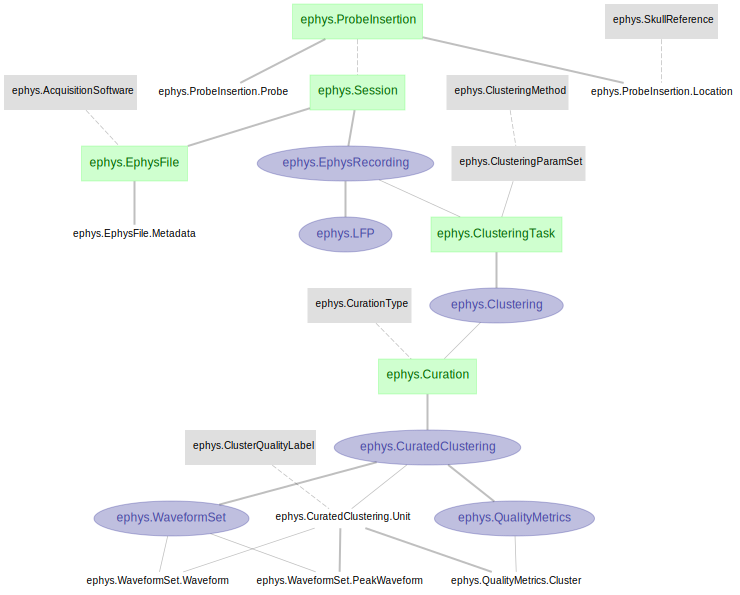

In [5]:
dj.ERD(ephys)

In [7]:
# sync info is here
stimulus.EphysSync & key

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,beh2stim_slope,beh2stim_intercept,npixel2beh_intercept,npixel2beh_slope,num_npixel_samples,sync_ts
27152,17,1,1.000009737554877,1647891916.378051,37.109854941289925,3.333311162582599e-05,179739000,2022-03-21 17:25:55


In [295]:
# this function is in the stimulus schema in the EphysSync table but I copied it here for convinience
def npixel_samples_in_stimulus_clock(npixel_samples,beh2stim_slope,beh2stim_intercept,npixel2beh_slope,npixel2beh_intercept): 
    np_in_stim_clock = beh2stim_slope*(npixel2beh_slope*npixel_samples + npixel2beh_intercept) + beh2stim_intercept
    return np_in_stim_clock


# get the neuropixels times synced with the stimulus clock
beh2stim_slope, beh2stim_intercept, npixel2beh_slope, npixel2beh_intercept, num_npixel_samples = (stimulus.EphysSync & key).fetch('beh2stim_slope','beh2stim_intercept','npixel2beh_slope','npixel2beh_intercept','num_npixel_samples')
npixel_samples = np.arange(num_npixel_samples)
npx_synced_times = npixel_samples_in_stimulus_clock(npixel_samples,beh2stim_slope,beh2stim_intercept,npixel2beh_slope,npixel2beh_intercept) # 

/tmp/ipykernel_12415/1832572571.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  npixel_samples = np.arange(num_npixel_samples)


In [296]:
#get the spike times of each unit
spike_times = (ephys.CuratedClustering.Unit & (ephys.Session() & key)).fetch('spike_times')
#and sync them
spike_times_synced = spike_times + npx_synced_times[0]

In [297]:
first_spike_time = np.min([s.min() for s in spike_times_synced])
last_spike_time = np.max([s.max() for s in spike_times_synced])

In [298]:
#now they are in the same clock as the trials
first_flip_time = (stimulus.Trial() & key).head(1)[0]['flip_times'][0][0]
last_flip_time = (stimulus.Trial() & key).tail(1)[0]['flip_times'][0][0]

In [299]:
print(key)
print('seconds from first spike to first flip:', first_flip_time - first_spike_time)
print('seconds from last flip to last spike:', last_spike_time - last_flip_time)

{'animal_id': 28489, 'session': 25, 'scan_idx': 1}
seconds from first spike to first flip: 82.77730822563171
seconds from last flip to last spike: 6.816073179244995


In [15]:
# image_rel = (stimulus.StaticImage.Image() * stimulus.StaticImage.ImageNet).proj('image', image_id_other='image_id')

In [14]:
static_image_rel = stimulus.StaticImage * stimulus.StaticImage.ImageNet * stimulus.StaticImage.Image
static_image_rel

image_class,image_id image id,imagenet_id id used in the actual imagenet dataset,frame_width pixels,frame_height pixels,num_channels number of channels in the image,description image content,image actual image
imagenet,0,n02808304_8892,256,144,1,bath_towel,=BLOB=
imagenet,1,n02909870_6487,256,144,1,bucket,=BLOB=
imagenet,2,n03393912_4860,256,144,1,freight_car,=BLOB=
imagenet,3,n03447447_4729,256,144,1,gondola,=BLOB=
imagenet,4,n03445777_1976,256,144,1,golf_ball,=BLOB=
imagenet,5,n03085013_22368,256,144,1,computer_keyboard,=BLOB=
imagenet,6,n02493509_10615,256,144,1,titi,=BLOB=
imagenet,7,n02033041_5332,256,144,1,dowitcher,=BLOB=
imagenet,8,n02783161_6238,256,144,1,ballpoint,=BLOB=
imagenet,9,n01820546_6799,256,144,1,lorikeet,=BLOB=


In [139]:
stimulus.Trial()

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,trial_idx trial index within sessions,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),flip_times (s) row array of flip times,last_flip the last flip number in this trial,trial_ts automatic
0,0,0,0,SRjLTvnvs21C7MRO9LXn,=BLOB=,56,2019-10-04 14:58:11
0,0,0,1,qe0z5DYScyAJWbJvyHP8,=BLOB=,112,2019-10-04 14:58:11
0,0,0,2,ZCrXw/Aou2oUg9tZG5c0,=BLOB=,168,2019-10-04 14:58:12
0,0,0,3,IlACW0Q9jgrbR9duFd00,=BLOB=,224,2019-10-04 14:58:13
0,0,0,4,+yh4O+elY2nCv82L65UE,=BLOB=,280,2019-10-04 14:58:14
0,0,0,5,OrsFPqJRbioMMUtz0I6/,=BLOB=,336,2019-10-04 14:58:15
0,0,0,6,Cvp0dvu21UJTENi4YDp3,=BLOB=,392,2019-10-04 14:58:16
0,0,0,7,hRbvmD58fDHZhYuUfB4K,=BLOB=,448,2019-10-04 14:58:17
0,0,0,8,0t0A/OaLTpKv8EVvfnWi,=BLOB=,504,2019-10-04 14:58:18
0,0,0,9,xP5FItC4EzFWgFROokjF,=BLOB=,560,2019-10-04 14:58:19


In [8]:
imagenet.TargetAlbumNpx()

collection_id image collection id,image_class
7,imagenet


In [138]:
stimulus.Imagenet()

image_id image id,imagenet_id imagenet id on external storage under scratch07,description image content
0,n02808304_8892,bath_towel
1,n02909870_6487,bucket
2,n03393912_4860,freight_car
3,n03447447_4729,gondola
4,n03445777_1976,golf_ball
5,n03085013_22368,computer_keyboard
6,n02493509_10615,titi
7,n02033041_5332,dowitcher
8,n02783161_6238,ballpoint
9,n01820546_6799,lorikeet


In [113]:
im1 = set(stimulus.Imagenet.fetch('imagenet_id'))

In [114]:
im2 = set(static_image_rel.fetch('imagenet_id'))

In [117]:
len(im1.intersection(im2))

124646

In [118]:
stimulus.Imagenet.head(20)

array([( 0, 'n02808304_8892', 'bath_towel'),
       ( 1, 'n02909870_6487', 'bucket'),
       ( 2, 'n03393912_4860', 'freight_car'),
       ( 3, 'n03447447_4729', 'gondola'),
       ( 4, 'n03445777_1976', 'golf_ball'),
       ( 5, 'n03085013_22368', 'computer_keyboard'),
       ( 6, 'n02493509_10615', 'titi'),
       ( 7, 'n02033041_5332', 'dowitcher'),
       ( 8, 'n02783161_6238', 'ballpoint'),
       ( 9, 'n01820546_6799', 'lorikeet'),
       (10, 'n02454379_12461', 'armadillo'),
       (11, 'n02782093_3141', 'balloon'),
       (12, 'n01530575_1586', 'brambling'),
       (13, 'n03496892_19660', 'harvester'),
       (14, 'n03290653_9549', 'entertainment_center'),
       (15, 'n03028079_25391', 'church'),
       (16, 'n02643566_3012', 'lionfish'),
       (17, 'n02992211_1492', 'cello'),
       (18, 'n02027492_1107', 'red-backed_sandpiper'),
       (19, 'n02910353_26061', 'buckle')],
      dtype=[('image_id', '<i8'), ('imagenet_id', 'O'), ('description', 'O')])

In [120]:
stimulus.StaticImage.ImageNet.head(20)

array([('imagenet',  0, 'n02808304_8892', 'bath_towel'),
       ('imagenet',  1, 'n02909870_6487', 'bucket'),
       ('imagenet',  2, 'n03393912_4860', 'freight_car'),
       ('imagenet',  3, 'n03447447_4729', 'gondola'),
       ('imagenet',  4, 'n03445777_1976', 'golf_ball'),
       ('imagenet',  5, 'n03085013_22368', 'computer_keyboard'),
       ('imagenet',  6, 'n02493509_10615', 'titi'),
       ('imagenet',  7, 'n02033041_5332', 'dowitcher'),
       ('imagenet',  8, 'n02783161_6238', 'ballpoint'),
       ('imagenet',  9, 'n01820546_6799', 'lorikeet'),
       ('imagenet', 10, 'n02454379_12461', 'armadillo'),
       ('imagenet', 11, 'n02782093_3141', 'balloon'),
       ('imagenet', 12, 'n01530575_1586', 'brambling'),
       ('imagenet', 13, 'n03496892_19660', 'harvester'),
       ('imagenet', 15, 'n03290653_9549', 'entertainment_center'),
       ('imagenet', 16, 'n03028079_25391', 'church'),
       ('imagenet', 17, 'n02643566_3012', 'lionfish'),
       ('imagenet', 18, 'n02992211_149

In [121]:
((dj.U('imagenet_id') * stimulus.Imagenet()).proj() & static_image_rel).head(20)

array([( 0, 'n02808304_8892'), ( 1, 'n02909870_6487'),
       ( 2, 'n03393912_4860'), ( 3, 'n03447447_4729'),
       ( 4, 'n03445777_1976'), ( 5, 'n03085013_22368'),
       ( 6, 'n02493509_10615'), ( 7, 'n02033041_5332'),
       ( 8, 'n02783161_6238'), ( 9, 'n01820546_6799'),
       (10, 'n02454379_12461'), (11, 'n02782093_3141'),
       (12, 'n01530575_1586'), (13, 'n03496892_19660')],
      dtype=[('image_id', '<i8'), ('imagenet_id', 'O')])

In [134]:
stimulus.StaticImage.ImageNet() & 'image_id=15'

image_class,image_id image id,imagenet_id id used in the actual imagenet dataset,description image content
imagenet,15,n03290653_9549,entertainment_center


In [135]:
stimulus.Imagenet() & 'image_id=14'

image_id image id,imagenet_id imagenet id on external storage under scratch07,description image content
14,n03290653_9549,entertainment_center


In [7]:
stimulus.Frame() & stimulus.StaticImage.ImageNet()

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration
+++BLBSNbXhwaMInh3IW,imagenet,87969,20.0973,0.1
++/xCwAO1Xcl99dA3C4y,imagenet,90498,0.475119,0.5
++0B7xzlNZVAHyad5+fd,imagenet,17703,0.454074,0.5
++0nsGPrmM7MZdBkJwSk,imagenet,1301,0.320145,0.5
++1ulzamGnbr3SmQOR/y,imagenet,22400,0.483729,0.5
++1Y27nFUsivO7IRogRr,imagenet,83508,20.0864,0.1
++2W7El2Q44xiO3Jf89L,imagenet,7154,0.889944,0.5
++3tQPRBlpY7qJVm3iDP,imagenet,5927,0.490555,0.5
++4BIi7WZ03QmXWDpF6+,imagenet,87808,20.0753,0.1
++4SfEt3NvRFdbJZOPOB,imagenet,6024,0.356411,0.5


In [106]:
stimulus.Frame()

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration
+++BLBSNbXhwaMInh3IW,imagenet,87969,20.0973,0.1
+++TsLjL4986OTmSXWgw,rendered_scene,5271,0.494689,0.5
++/pqtwB8lwlyhKGR2GC,masked_local_texture_dei,10589,0.3874,0.5
++/vWC2yqiF6J7WIMHlB,inh_surround,4088,0.425422,0.5
++/xCwAO1Xcl99dA3C4y,imagenet,90498,0.475119,0.5
++0B7xzlNZVAHyad5+fd,imagenet,17703,0.454074,0.5
++0dfsTgXsd37WorC4SY,local_texture_dei_fixed_swap,1093,0.406328,0.5
++0nsGPrmM7MZdBkJwSk,imagenet,1301,0.320145,0.5
++0uXtOzx4rT835+d8im,searched_nat,13370,0.382178,0.5
++12muO8WMgoFA4Uf3Ol,mask_fixed_mei,4470,0.48142,0.5


In [43]:
npx_imagenet = (imagenet.Album.Single & imagenet.TargetAlbumNpx) * stimulus.Imagenet

In [105]:
(imagenet.Album.Single & imagenet.TargetAlbumNpx) * stimulus.Imagenet

collection_id image collection id,image_class,image_id image id,imagenet_id imagenet id on external storage under scratch07,description image content
7,imagenet,21748,n02860847_2752,bobsled
7,imagenet,21749,n03792782_37236,mountain_bike
7,imagenet,21750,n02794156_2209,barometer
7,imagenet,21751,n06785654_6229,crossword_puzzle
7,imagenet,21752,n13133613_69777,ear
7,imagenet,21753,n01945685_4244,slug
7,imagenet,21754,n02033041_4155,dowitcher
7,imagenet,21755,n02445715_10561,skunk
7,imagenet,21756,n02093256_12277,Staffordshire_bullterrier
7,imagenet,21757,n04146614_6388,school_bus


In [15]:
imagenet.TargetAlbum()

collection_id image collection id,image_class
12,imagenet_v2_gray


In [14]:
imagenet.TargetAlbumNpx()

collection_id image collection id,image_class
7,imagenet


In [17]:
imagenet.TargetAlbumNpx.fetch1()

{'collection_id': 7, 'image_class': 'imagenet'}

In [11]:
image_rel = (imagenet.Album.Single & imagenet.TargetAlbumNpx) * stimulus.StaticImage.ImageNet * stimulus.StaticImage()

In [30]:
data = (stimulus.StaticImage.Image & image_rel).head(1, as_dict=True)[0]

In [34]:
data['image']

array([[131, 131, 130, ...,  42,  44,  48],
       [130, 131, 130, ...,  33,  39,  44],
       [129, 131, 131, ...,  27,  34,  41],
       ...,
       [126, 126, 125, ..., 128, 128, 127],
       [126, 126, 125, ..., 127, 127, 127],
       [126, 126, 125, ..., 126, 127, 127]], shape=(144, 256), dtype=uint8)

In [26]:
stimulus.StaticImage.Image()

image_class,image_id image id,image actual image
blur_mei,0,=BLOB=
blur_mei,1,=BLOB=
blur_mei,2,=BLOB=
blur_mei,3,=BLOB=
blur_mei,4,=BLOB=
blur_mei,5,=BLOB=
blur_mei,6,=BLOB=
blur_mei,7,=BLOB=
blur_mei,8,=BLOB=
blur_mei,9,=BLOB=


In [18]:
imagenet.TargetAlbumNpx()

collection_id image collection id,image_class
7,imagenet


In [19]:
imagenet.Album.Oracle()

collection_id image collection id,image_class,image_id image id
1,checkerboard,5000
1,checkerboard,5001
1,checkerboard,5002
1,checkerboard,5003
1,checkerboard,5004
1,checkerboard,5005
1,checkerboard,5006
1,checkerboard,5007
1,checkerboard,5008
1,checkerboard,5009


In [22]:
stimulus.StaticImage.Image()


KeyboardInterrupt



In [8]:
(imagenet.Album.Oracle & imagenet.TargetAlbumNpx) * stimulus.StaticImage.ImageNet * stimulus.StaticImage()

collection_id image collection id,image_class,image_id image id,imagenet_id id used in the actual imagenet dataset,description image content,frame_width pixels,frame_height pixels,num_channels number of channels in the image
7,imagenet,104,n01818515_6993,macaw,256,144,1
7,imagenet,128,n02457408_567,three-toed_sloth,256,144,1
7,imagenet,183,n02704792_29207,amphibian,256,144,1
7,imagenet,355,n01871265_11585,tusker,256,144,1
7,imagenet,479,n02107908_8397,Appenzeller,256,144,1
7,imagenet,483,n02395406_8391,hog,256,144,1
7,imagenet,656,n02655020_17608,puffer,256,144,1
7,imagenet,803,n02509815_13263,lesser_panda,256,144,1
7,imagenet,830,n02113799_2765,standard_poodle,256,144,1
7,imagenet,936,n01532829_1774,house_finch,256,144,1


In [10]:
imagenet.Album.Oracle & imagenet.TargetAlbumNpx

collection_id image collection id,image_class,image_id image id
7,imagenet,104
7,imagenet,128
7,imagenet,183
7,imagenet,355
7,imagenet,479
7,imagenet,483
7,imagenet,656
7,imagenet,803
7,imagenet,830
7,imagenet,936


In [9]:
((imagenet.Album.Oracle & imagenet.TargetAlbumNpx) * stimulus.Frame) + 

collection_id image collection id,image_class,image_id image id,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),pre_blank_period (s) off duration,presentation_time (s) image duration
7,imagenet,104,+bWafhD7SxNpnWhMZWCe,0.347088,0.5
7,imagenet,104,+NMYCCKOy+K3V80tDNVB,0.682911,0.5
7,imagenet,104,+VYpn3EIpAMRvoV/FXXQ,0.434368,0.5
7,imagenet,104,/2h/YtQpcJEQ8sxG7sLm,0.486107,0.5
7,imagenet,104,/5wkp9zt+0TrEzQXzCe7,0.493347,0.5
7,imagenet,104,/jQ0qJ81Hg9cXApQL5tE,0.400562,0.5
7,imagenet,104,/q4DOVIRizDKztCLHNOw,0.449377,0.5
7,imagenet,104,0h2c4mD2eJCKhUiRjhh+,0.504317,0.5
7,imagenet,104,0lLm0qkD2YdLIRGlehD0,0.306951,0.5
7,imagenet,104,10pxKJSK8TO7+s+cKLAq,0.41924,0.5


In [ ]:
(imagenet.Album.Single & imagenet.TargetAlbumNpx) * stimulus.Imagenet

In [90]:
stimulus.StaticImage.ImageNet()

image_class,image_id image id,imagenet_id id used in the actual imagenet dataset,description image content
imagenet,0,n02808304_8892,bath_towel
imagenet,1,n02909870_6487,bucket
imagenet,2,n03393912_4860,freight_car
imagenet,3,n03447447_4729,gondola
imagenet,4,n03445777_1976,golf_ball
imagenet,5,n03085013_22368,computer_keyboard
imagenet,6,n02493509_10615,titi
imagenet,7,n02033041_5332,dowitcher
imagenet,8,n02783161_6238,ballpoint
imagenet,9,n01820546_6799,lorikeet


In [87]:
stimulus.Imagenet()

image_id image id,imagenet_id imagenet id on external storage under scratch07,description image content
0,n02808304_8892,bath_towel
1,n02909870_6487,bucket
2,n03393912_4860,freight_car
3,n03447447_4729,gondola
4,n03445777_1976,golf_ball
5,n03085013_22368,computer_keyboard
6,n02493509_10615,titi
7,n02033041_5332,dowitcher
8,n02783161_6238,ballpoint
9,n01820546_6799,lorikeet


In [50]:
npx_imagenet

collection_id image collection id,image_class,image_id image id,imagenet_id imagenet id on external storage under scratch07,description image content
7,imagenet,21748,n02860847_2752,bobsled
7,imagenet,21749,n03792782_37236,mountain_bike
7,imagenet,21750,n02794156_2209,barometer
7,imagenet,21751,n06785654_6229,crossword_puzzle
7,imagenet,21752,n13133613_69777,ear
7,imagenet,21753,n01945685_4244,slug
7,imagenet,21754,n02033041_4155,dowitcher
7,imagenet,21755,n02445715_10561,skunk
7,imagenet,21756,n02093256_12277,Staffordshire_bullterrier
7,imagenet,21757,n04146614_6388,school_bus


In [49]:
stimulus.Imagenet()

image_id image id,imagenet_id imagenet id on external storage under scratch07,description image content
0,n02808304_8892,bath_towel
1,n02909870_6487,bucket
2,n03393912_4860,freight_car
3,n03447447_4729,gondola
4,n03445777_1976,golf_ball
5,n03085013_22368,computer_keyboard
6,n02493509_10615,titi
7,n02033041_5332,dowitcher
8,n02783161_6238,ballpoint
9,n01820546_6799,lorikeet


In [18]:
trial_rel = stimulus.Frame * stimulus.Trial & key

In [61]:
(imagenet.Album.Single & {'image_class': 'imagenet'})

collection_id image collection id,image_class,image_id image id
1,imagenet,0
1,imagenet,2
1,imagenet,4
1,imagenet,5
1,imagenet,6
1,imagenet,7
1,imagenet,10
1,imagenet,13
1,imagenet,15
1,imagenet,16


In [81]:
oracle_rel = imagenet.Album.Oracle & {'image_class': 'imagenet', 'collection_id': 3}
oracle_rel

collection_id image collection id,image_class,image_id image id
3,imagenet,104
3,imagenet,128
3,imagenet,183
3,imagenet,355
3,imagenet,479
3,imagenet,483
3,imagenet,656
3,imagenet,803
3,imagenet,830
3,imagenet,936


In [79]:
single_rel = imagenet.Album.Single & {'image_class': 'imagenet', 'collection_id': 3}
single_rel

collection_id image collection id,image_class,image_id image id
3,imagenet,1
3,imagenet,3
3,imagenet,8
3,imagenet,9
3,imagenet,11
3,imagenet,12
3,imagenet,18
3,imagenet,20
3,imagenet,24
3,imagenet,40


In [83]:
trial_rel & oracle_rel

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,trial_idx trial index within sessions,image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration,flip_times (s) row array of flip times,last_flip the last flip number in this trial,trial_ts automatic
+avOuWP2hgH/295+obH+,27152,17,1,192,imagenet,7017,0.3812,0.5,=BLOB=,579,2022-03-21 12:50:24
+avOuWP2hgH/295+obH+,27152,17,1,412,imagenet,7017,0.3812,0.5,=BLOB=,1239,2022-03-21 12:53:59
+avOuWP2hgH/295+obH+,27152,17,1,1655,imagenet,7017,0.3812,0.5,=BLOB=,4968,2022-03-21 13:14:23
+avOuWP2hgH/295+obH+,27152,17,1,2486,imagenet,7017,0.3812,0.5,=BLOB=,7461,2022-03-21 13:28:04
+avOuWP2hgH/295+obH+,27152,17,1,2858,imagenet,7017,0.3812,0.5,=BLOB=,8577,2022-03-21 13:34:09
+avOuWP2hgH/295+obH+,27152,17,1,4337,imagenet,7017,0.3812,0.5,=BLOB=,13014,2022-03-21 13:58:23
+avOuWP2hgH/295+obH+,27152,17,1,4768,imagenet,7017,0.3812,0.5,=BLOB=,14307,2022-03-21 14:05:28
+avOuWP2hgH/295+obH+,27152,17,1,5386,imagenet,7017,0.3812,0.5,=BLOB=,16161,2022-03-21 14:15:36
+avOuWP2hgH/295+obH+,27152,17,1,5622,imagenet,7017,0.3812,0.5,=BLOB=,16869,2022-03-21 14:19:29
+avOuWP2hgH/295+obH+,27152,17,1,5662,imagenet,7017,0.3812,0.5,=BLOB=,16989,2022-03-21 14:20:08


collection_id image collection id,image_class,image_id image id
1,checkerboard,5000
1,checkerboard,5001
1,checkerboard,5002
1,checkerboard,5003
1,checkerboard,5004
1,checkerboard,5005
1,checkerboard,5006
1,checkerboard,5007
1,checkerboard,5008
1,checkerboard,5009


In [14]:
image_rel

collection_id image collection id,image_class,image_id image id,imagenet_id id used in the actual imagenet dataset,description image content,frame_width pixels,frame_height pixels,num_channels number of channels in the image
7,imagenet,21748,n03888257_31301,parachute,256,144,1
7,imagenet,21749,n03709823_12740,mailbag,256,144,1
7,imagenet,21750,n03658185_9598,letter_opener,256,144,1
7,imagenet,21751,n09835506_2015,ballplayer,256,144,1
7,imagenet,21752,n02123159_4376,tiger_cat,256,144,1
7,imagenet,21753,n02093991_1445,Irish_terrier,256,144,1
7,imagenet,21754,n01665541_2082,leatherback_turtle,256,144,1
7,imagenet,21755,n02017213_616,European_gallinule,256,144,1
7,imagenet,21756,n03832673_26243,notebook,256,144,1
7,imagenet,21757,n07584110_8485,consomme,256,144,1


In [52]:
stim_info_rel = (stimulus.Frame() & (stimulus.Trial & key)) * (imagenet.Album.Single() & imagenet.TargetAlbumNpx()) * stimulus.Imagenet() #* image_rel

ERROR! Session/line number was not unique in database. History logging moved to new session 109


In [57]:
dj.U('condition_hash') & stim_info_rel

condition_hash 120-bit hash (The first 20 chars of MD5 in base64)
++xcBo77hxkuTL2dPq/t
+/k9lGMQLDWipvuS/ZGx
+/nSZDnvoV+UKV99V+cV
+0K7jS8y4fbkhLiMSk8k
+1PSx+OcnMlPBfxnVhVh
+2im1C0u3DtyDF9GVlkh
+5gzc45UIsSacACP+V5t
+5k3Gbui9ifACi3DgqIv
+5ZXbgQrRpNcHLP26AUR
+7Ix6IHXsZ9i1xAg/zrT


In [72]:
(stimulus.Frame() & ((dj.U('condition_hash') & (stimulus.Trial & key)) - (dj.U('condition_hash') & stim_info_rel))) & oracle_trial_rel.proj()

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration
3mmwSf1O+EF6jSNHhPI5,imagenet,479,0.144344,0.5
5BErLsxwfMQ77EUxpjQW,imagenet,2747,0.10733,0.5
5I67kmu9uL5iQXu56utC,imagenet,4397,0.193927,0.5
5vfRxsZ3YHE1sO0NmLYO,imagenet,4231,0.17369,0.5
5XBhkywYOvVHlco/C1qx,imagenet,1756,0.108068,0.5
6vlXYaQ/Zs7/CNOxYexS,imagenet,3924,0.163256,0.5
89XWD8dizcjmSO0F4cxB,imagenet,5671,0.198754,0.5
8NdlMNHOcgfMLyOLhlDu,imagenet,3107,0.118223,0.5
8saqz1rWH5hZW2QI+0lQ,imagenet,3507,0.133233,0.5
9nwNPuQU00t8frvHmHpq,imagenet,1796,0.170133,0.5


In [66]:
stimulus.Frame() & 'image_class="imagenet"'

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration
+++BLBSNbXhwaMInh3IW,imagenet,87969,20.0973,0.1
++/xCwAO1Xcl99dA3C4y,imagenet,90498,0.475119,0.5
++0B7xzlNZVAHyad5+fd,imagenet,17703,0.454074,0.5
++0nsGPrmM7MZdBkJwSk,imagenet,1301,0.320145,0.5
++1ulzamGnbr3SmQOR/y,imagenet,22400,0.483729,0.5
++1Y27nFUsivO7IRogRr,imagenet,83508,20.0864,0.1
++2W7El2Q44xiO3Jf89L,imagenet,7154,0.889944,0.5
++3tQPRBlpY7qJVm3iDP,imagenet,5927,0.490555,0.5
++4BIi7WZ03QmXWDpF6+,imagenet,87808,20.0753,0.1
++4SfEt3NvRFdbJZOPOB,imagenet,6024,0.356411,0.5


In [35]:
stim_info_rel & 'image_id=22924'

[2026-01-09 13:15:26,545][WARNING]: MySQL server has gone away. Reconnecting to the server.


condition_hash 120-bit hash (The first 20 chars of MD5 in base64),collection_id image collection id,image_class,image_id image id,image_id_other image id,imagenet_id id used in the actual imagenet dataset,pre_blank_period (s) off duration,presentation_time (s) image duration,description image content,image actual image
++xcBo77hxkuTL2dPq/t,7,imagenet,22924,23682,n02097298_8086,0.181091,0.5,Scotch_terrier,=BLOB=


collection_id image collection id,image_class
7,imagenet


In [154]:
(stim_info_rel & 'image_id=22924').head(1, as_dict=True)[0]['image']

array([[180, 182, 183, ...,  26,  26,  23],
       [184, 186, 186, ...,  28,  27,  24],
       [186, 186, 185, ...,  28,  28,  28],
       ...,
       [158, 156, 160, ..., 136, 136, 130],
       [154, 152, 156, ..., 124, 127, 131],
       [152, 149, 151, ..., 128, 129, 140]], dtype=uint8)

In [45]:
dj.U('image_id') & (stimulus.Frame & (stimulus.Trial() & key))

image_id image id
104
128
183
355
479
483
656
803
830
936


In [33]:
stimulus.Imagenet()

image_id image id,imagenet_id imagenet id on external storage under scratch07,description image content
0,n02808304_8892,bath_towel
1,n02909870_6487,bucket
2,n03393912_4860,freight_car
3,n03447447_4729,gondola
4,n03445777_1976,golf_ball
5,n03085013_22368,computer_keyboard
6,n02493509_10615,titi
7,n02033041_5332,dowitcher
8,n02783161_6238,ballpoint
9,n01820546_6799,lorikeet


condition_hash 120-bit hash (The first 20 chars of MD5 in base64),image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration
+++BLBSNbXhwaMInh3IW,imagenet,87969,20.0973,0.1
++/xCwAO1Xcl99dA3C4y,imagenet,90498,0.475119,0.5
++0B7xzlNZVAHyad5+fd,imagenet,17703,0.454074,0.5
++0nsGPrmM7MZdBkJwSk,imagenet,1301,0.320145,0.5
++1ulzamGnbr3SmQOR/y,imagenet,22400,0.483729,0.5
++1Y27nFUsivO7IRogRr,imagenet,83508,20.0864,0.1
++2W7El2Q44xiO3Jf89L,imagenet,7154,0.889944,0.5
++3tQPRBlpY7qJVm3iDP,imagenet,5927,0.490555,0.5
++4BIi7WZ03QmXWDpF6+,imagenet,87808,20.0753,0.1
++4SfEt3NvRFdbJZOPOB,imagenet,6024,0.356411,0.5


In [29]:
(stimulus.Trial() & key) * stimulus.Frame() & 'condition_hash="5BErLsxwfMQ77EUxpjQW"'

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,trial_idx trial index within sessions,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),flip_times (s) row array of flip times,last_flip the last flip number in this trial,trial_ts automatic,image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration
28489,25,1,4,5BErLsxwfMQ77EUxpjQW,=BLOB=,15,2022-11-23 13:03:42,imagenet,2747,0.10733,0.5
28489,25,1,62,5BErLsxwfMQ77EUxpjQW,=BLOB=,189,2022-11-23 13:04:25,imagenet,2747,0.10733,0.5
28489,25,1,153,5BErLsxwfMQ77EUxpjQW,=BLOB=,462,2022-11-23 13:05:31,imagenet,2747,0.10733,0.5
28489,25,1,480,5BErLsxwfMQ77EUxpjQW,=BLOB=,1443,2022-11-23 13:09:30,imagenet,2747,0.10733,0.5
28489,25,1,487,5BErLsxwfMQ77EUxpjQW,=BLOB=,1464,2022-11-23 13:09:35,imagenet,2747,0.10733,0.5
28489,25,1,905,5BErLsxwfMQ77EUxpjQW,=BLOB=,2718,2022-11-23 13:14:40,imagenet,2747,0.10733,0.5
28489,25,1,2820,5BErLsxwfMQ77EUxpjQW,=BLOB=,8463,2022-11-23 13:37:59,imagenet,2747,0.10733,0.5
28489,25,1,5427,5BErLsxwfMQ77EUxpjQW,=BLOB=,16284,2022-11-23 14:09:41,imagenet,2747,0.10733,0.5
28489,25,1,5736,5BErLsxwfMQ77EUxpjQW,=BLOB=,17211,2022-11-23 14:13:27,imagenet,2747,0.10733,0.5
28489,25,1,5931,5BErLsxwfMQ77EUxpjQW,=BLOB=,17796,2022-11-23 14:15:49,imagenet,2747,0.10733,0.5


In [73]:
imagenet.Album.Oracle & 'image_class = "imagenet"' & imagenet.TargetAlbumNpx()

collection_id image collection id,image_class,image_id image id
7,imagenet,104
7,imagenet,128
7,imagenet,183
7,imagenet,355
7,imagenet,479
7,imagenet,483
7,imagenet,656
7,imagenet,803
7,imagenet,830
7,imagenet,936


In [17]:
images_oracle = (imagenet.Album.Oracle & 'image_class = "imagenet"' & imagenet.TargetAlbumNpx()) * stimulus.StaticImage.Image()
oracle_trial_rel = (stimulus.Trial & key) * stimulus.Frame * images_oracle

In [75]:
stimulus.Frame()

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration
+++BLBSNbXhwaMInh3IW,imagenet,87969,20.0973,0.1
+++TsLjL4986OTmSXWgw,rendered_scene,5271,0.494689,0.5
++/pqtwB8lwlyhKGR2GC,masked_local_texture_dei,10589,0.3874,0.5
++/vWC2yqiF6J7WIMHlB,inh_surround,4088,0.425422,0.5
++/xCwAO1Xcl99dA3C4y,imagenet,90498,0.475119,0.5
++0B7xzlNZVAHyad5+fd,imagenet,17703,0.454074,0.5
++0dfsTgXsd37WorC4SY,local_texture_dei_fixed_swap,1093,0.406328,0.5
++0nsGPrmM7MZdBkJwSk,imagenet,1301,0.320145,0.5
++0uXtOzx4rT835+d8im,searched_nat,13370,0.382178,0.5
++12muO8WMgoFA4Uf3Ol,mask_fixed_mei,4470,0.48142,0.5


In [74]:
images_oracle

collection_id image collection id,image_class,image_id image id,image actual image
7,imagenet,104,=BLOB=
7,imagenet,128,=BLOB=
7,imagenet,183,=BLOB=
7,imagenet,355,=BLOB=
7,imagenet,479,=BLOB=
7,imagenet,483,=BLOB=
7,imagenet,656,=BLOB=
7,imagenet,803,=BLOB=
7,imagenet,830,=BLOB=
7,imagenet,936,=BLOB=


In [68]:
oracle_trial_rel

animal_id id number,session session index for the mouse,scan_idx number of TIFF stack file,trial_idx trial index within sessions,condition_hash 120-bit hash (The first 20 chars of MD5 in base64),collection_id image collection id,image_class,image_id image id,flip_times (s) row array of flip times,last_flip the last flip number in this trial,trial_ts automatic,pre_blank_period (s) off duration,presentation_time (s) image duration,image actual image
28489,25,1,3,ZS7g0bMXRZa1wEaMRU3U,7,imagenet,6066,=BLOB=,12,2022-11-23 13:03:42,0.105419,0.5,=BLOB=
28489,25,1,4,5BErLsxwfMQ77EUxpjQW,7,imagenet,2747,=BLOB=,15,2022-11-23 13:03:42,0.10733,0.5,=BLOB=
28489,25,1,5,Ksxd2PDvUTJNKyirtm6S,7,imagenet,3018,=BLOB=,18,2022-11-23 13:03:43,0.174905,0.5,=BLOB=
28489,25,1,9,wwp4M8BvmH8wbB5V5FOJ,7,imagenet,5322,=BLOB=,30,2022-11-23 13:03:46,0.102083,0.5,=BLOB=
28489,25,1,10,PCu6ZcWtapflMNUVQDh+,7,imagenet,3144,=BLOB=,33,2022-11-23 13:03:47,0.132767,0.5,=BLOB=
28489,25,1,18,vMqzaHNMYznN/7Ua4YoL,7,imagenet,4430,=BLOB=,57,2022-11-23 13:03:53,0.112199,0.5,=BLOB=
28489,25,1,29,l6VN8ipommGmegaa3yZ2,7,imagenet,7017,=BLOB=,90,2022-11-23 13:04:01,0.122146,0.5,=BLOB=
28489,25,1,37,5XBhkywYOvVHlco/C1qx,7,imagenet,1756,=BLOB=,114,2022-11-23 13:04:06,0.108068,0.5,=BLOB=
28489,25,1,42,CrY8sAIoM1qJAcI4PT8l,7,imagenet,4812,=BLOB=,129,2022-11-23 13:04:10,0.156272,0.5,=BLOB=
28489,25,1,54,DDC3cOK7dDzIqLGgA3Xy,7,imagenet,2803,=BLOB=,165,2022-11-23 13:04:19,0.116468,0.5,=BLOB=


In [9]:
stimulus.Frame()

condition_hash 120-bit hash (The first 20 chars of MD5 in base64),image_class,image_id image id,pre_blank_period (s) off duration,presentation_time (s) image duration
+++BLBSNbXhwaMInh3IW,imagenet,87969,20.0973,0.1
+++TsLjL4986OTmSXWgw,rendered_scene,5271,0.494689,0.5
++/pqtwB8lwlyhKGR2GC,masked_local_texture_dei,10589,0.3874,0.5
++/vWC2yqiF6J7WIMHlB,inh_surround,4088,0.425422,0.5
++/xCwAO1Xcl99dA3C4y,imagenet,90498,0.475119,0.5
++0B7xzlNZVAHyad5+fd,imagenet,17703,0.454074,0.5
++0dfsTgXsd37WorC4SY,local_texture_dei_fixed_swap,1093,0.406328,0.5
++0nsGPrmM7MZdBkJwSk,imagenet,1301,0.320145,0.5
++0uXtOzx4rT835+d8im,searched_nat,13370,0.382178,0.5
++12muO8WMgoFA4Uf3Ol,mask_fixed_mei,4470,0.48142,0.5


In [58]:
# here is the path for the raw data, should be scratch12 or 11 (even 10) but I don't remember and cannot access the scratch disks now
# e.g. the spike sorted data should be in a folder like: /mnt/scratch11/Ephys/Mouse/2023-05-23_11-32-50/spike_sorted
# and the raw data (binary and h5 files): /mnt/scratch11/Ephys/Mouse/2023-05-23_11-32-50/2023-05-23_11-33-04
# for each recording session there should be one binary file and mmultiple h5 files which will be named something like NPElectrophysiology.bin or #.h5
ephys.EphysFile() & (ephys.Session() & key)

inc_id incremental encompassing session inc_id,session_path file path or directory for an ephys session,acq_software
51,/raw/Mouse/2023-05-18_12-52-46/2023-05-18_12-53-51,LabviewV1


In [115]:
# below is a test to be sure that the data I sent you were reasonable

In [59]:
def compute_explainable_var(outputs, eps=1e-9):
    """
   Args:
       outputs (list): Neuronal responses (ground truth) to image repeats. Dimensions: [num_images] np.array(num_reaps, num_neurons).
                       Expects either a 3D numpy array of shape (N images, N repeats, N neurons),
                       or a list of numpy arrays. with one list per test image, for example:
                            outputs = [np.array(20, 100), np.array(19, 100), np.array(20, 100), ...]
                        - in this example, there are as many images as there are list entries.
                        - and in each array, there are the number of responses
                            (20 repeats, or less, depending on the number of valid trials)
                            times the number of neurons (N=100 in this example)
   Returns:
       explainable_var (np.array): the fraction of explainable variance per neuron (0.0 - 1.0)

   """
    ImgVariance = []
    TotalVar = np.var(np.vstack(outputs), axis=0, ddof=1)
    for out in outputs:
        ImgVariance.append(np.var(out, axis=0, ddof=1))
    ImgVariance = np.vstack(ImgVariance)
    NoiseVar = np.mean(ImgVariance, axis=0)
    explainable_var = (TotalVar - NoiseVar) / (TotalVar + eps)
    return explainable_var

In [60]:
%%time
## get the responses to the oracle images from all clusters within the range of channels 
keep_clusters = (ephys.CuratedClustering.Unit & (ephys.Session() & key)).fetch('unit_id')

images_oracle = (imagenet.Album.Oracle & 'image_class = "imagenet"' & imagenet.TargetAlbumNpx()) * stimulus.StaticImage.Image()

#keep_clusters = cluster_info[(cluster_info["ch"] >= np.min(keep_channels)) & (cluster_info["ch"] <= np.max(keep_channels))] 

images_oracle = (imagenet.Album.Oracle & 'image_class = "imagenet"' & imagenet.TargetAlbumNpx()) * stimulus.StaticImage.Image()
conds = ((stimulus.Trial & key) * stimulus.Frame * images_oracle).fetch('condition_hash', order_by='condition_hash')
n_repeats = 10

responses_all = np.empty((len(images_oracle), n_repeats, len(keep_clusters)))

for icnd, cnd in enumerate(np.unique(conds)):
    trials, flip_times = (stimulus.Trial & key & f'condition_hash = "{cnd}"').fetch('trial_idx', 'flip_times')
    #print(icnd, cnd, len(trials))
    for itr, tr in enumerate(trials):
        #print(itr, tr)
        for icl, cl in enumerate(keep_clusters):  # run for each cluster id
            #print(f'unit id: {cl}')
            clust_spikes = spike_times_synced[icl]
            responses_all[icnd][itr][icl] = len(clust_spikes[(clust_spikes >= flip_times[itr][0][1]+0.05) & (clust_spikes <= flip_times[itr][0][2]+0.05)])

exp_var = compute_explainable_var(responses_all)
print(np.shape(responses_all))

(100, 10, 547)
CPU times: user 40.7 s, sys: 107 ms, total: 40.8 s
Wall time: 41.1 s


Text(0.5, 1.0, "{'animal_id': 29189, 'session': 16, 'scan_idx': 1} explainable var of all units")

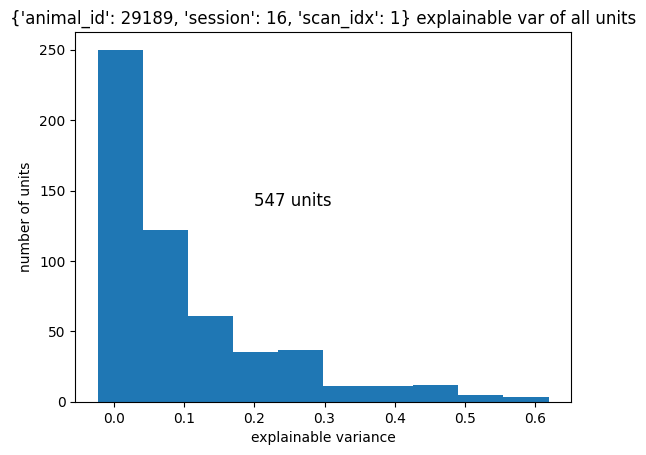

In [61]:
# all units 
plt.hist(exp_var)
plt.xlabel('explainable variance')
plt.ylabel('number of units')
plt.text(0.2, int(np.shape(responses_all)[2]/4), f'{np.shape(responses_all)[2]} units',  ha='left', va='bottom', fontsize = 12)
plt.title(f'{key} explainable var of all units')
#plt.savefig(f'4_{key}_expl_var_all.pdf')